
# Topic 1: Training a Simple Perceptron

The perceptron will:
1. Initialize random weights and a bias. (You can initialize them to zeroes)
2. Predict outputs using a step activation function.
3. Adjust weights until all predictions match expected outputs. (Dataset must be Linearly Separable)


### Imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Single Output Single Layer Training

In [2]:
class SimplePerceptron:
    """A minimal implementation of a single-layer perceptron."""
    def __init__(self, n_features, lr=1.0):
        self.lr = lr
        self.weights = np.random.uniform(-1, 1, n_features)
        self.bias = np.random.uniform(-1, 1)

    def step(self, x):
        """Binary step activation function."""
        return 1 if x >= 0 else 0

    def predict(self, x):
        """Make a binary prediction for input vector x."""
        return self.step(np.dot(x, self.weights) + self.bias)

    def train(self, X, y):
        """Train perceptron until all predictions are correct."""
        n_samples = X.shape[0]

        print(f"Initial weights: {self.weights}")
        print(f"Initial bias: {self.bias}\n")

        y_preds = np.zeros_like(y)
        epoch = 0

        # Keep training until predictions match labels
        while not np.all(y_preds == y):
            epoch += 1
            for i in range(n_samples):
                y_pred = self.predict(X[i])
                error = y[i] - y_pred

                # Update weights & bias if there is an error
                if error != 0:
                    self.weights += self.lr * error * X[i]
                    self.bias += self.lr * error

            y_preds = np.array([self.predict(x) for x in X])
            print(f"Epoch {epoch}: Weights = {self.weights}, Bias = {self.bias}")

        print("\nTraining complete.")
        return self.weights, self.bias


# Example: OR gate dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 1])

# Initialize and train perceptron
perceptron = SimplePerceptron(n_features=X.shape[1])
weights, bias = perceptron.train(X, y)

print("\nFinal Weights:", weights)
print("Final Bias:", bias)

print("\nPredictions:")
for x in X:
    print(f"{x} → {perceptron.predict(x)}")


Initial weights: [-0.02090416  0.12117451]
Initial bias: 0.8021529401165235

Epoch 1: Weights = [-0.02090416  1.12117451], Bias = 0.8021529401165235
Epoch 2: Weights = [0.97909584 1.12117451], Bias = 0.8021529401165235
Epoch 3: Weights = [0.97909584 1.12117451], Bias = -0.1978470598834765

Training complete.

Final Weights: [0.97909584 1.12117451]
Final Bias: -0.1978470598834765

Predictions:
[0 0] → 0
[0 1] → 1
[1 0] → 1
[1 1] → 1


### Multiple Output Single Layer Training

In [3]:
class SimplePerceptronMultiOutput:
    """Single-layer perceptron with multiple independent output neurons."""

    def __init__(self, n_features, n_outputs, lr=1.0):
        self.lr = lr
        # Each output neuron has its own weights and bias
        self.weights = np.random.uniform(-1, 1, (n_outputs, n_features))
        self.bias = np.random.uniform(-1, 1, n_outputs)

    def step(self, x):
        """Binary step activation."""
        return 1 if x >= 0 else 0

    def predict(self, x):
        """Predicts multiple outputs using independent perceptrons."""
        outputs = []
        for j in range(len(self.bias)): # type: ignore
            net = np.dot(x, self.weights[j]) + self.bias[j] # type: ignore
            outputs.append(self.step(net))
        return np.array(outputs)

    def train(self, X, Y):
        """
        Train perceptron until all predictions are correct.
        X: (n_samples, n_features)
        Y: (n_samples, n_outputs)
        """
        n_samples = X.shape[0]
        Y_preds = np.zeros_like(Y)
        epoch = 0

        print(f"Initial weights:\n{self.weights}")
        print(f"Initial bias:\n{self.bias}\n")

        # Keep training until all outputs match
        while not np.all(Y_preds == Y):
            epoch += 1
            for i in range(n_samples):
                y_pred = self.predict(X[i])
                error = Y[i] - y_pred  # shape (n_outputs,)

                # Update each output neuron independently
                for j in range(len(error)):
                    if error[j] != 0:
                        self.weights[j] += self.lr * error[j] * X[i]
                        self.bias[j] += self.lr * error[j] # type: ignore

            Y_preds = np.array([self.predict(x) for x in X])
            print(f"Epoch {epoch}:")
            print(f"Weights:\n{self.weights}")
            print(f"Bias:\n{self.bias}\n")

        print("Training complete.\n")
        return self.weights, self.bias


# Example: multi-output (OR and AND)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array(
    [
        [0, 0],  # 0 OR 0 = 0, 0 AND 0 = 0
        [1, 0],  # 0 OR 1 = 1, 0 AND 1 = 0
        [1, 0],  # 1 OR 0 = 1, 1 AND 0 = 0
        [1, 1],  # 1 OR 1 = 1, 1 AND 1 = 1
    ]
)

# Train
perceptron = SimplePerceptronMultiOutput(n_features=2, n_outputs=2)
weights, bias = perceptron.train(X, Y)

# Test
print("Final Weights:\n", weights)
print("Final Bias:\n", bias)

print("\nPredictions:")
for x in X:
    print(f"{x} → {perceptron.predict(x)}")

Initial weights:
[[ 0.12660456 -0.52938411]
 [-0.14869165 -0.08384512]]
Initial bias:
[ 0.41869477 -0.15872003]

Epoch 1:
Weights:
[[0.12660456 0.47061589]
 [0.85130835 0.91615488]]
Bias:
[0.41869477 0.84127997]

Epoch 2:
Weights:
[[0.12660456 1.47061589]
 [1.85130835 0.91615488]]
Bias:
[ 0.41869477 -0.15872003]

Epoch 3:
Weights:
[[1.12660456 1.47061589]
 [1.85130835 0.91615488]]
Bias:
[ 0.41869477 -1.15872003]

Epoch 4:
Weights:
[[1.12660456 1.47061589]
 [1.85130835 1.91615488]]
Bias:
[-0.58130523 -1.15872003]

Epoch 5:
Weights:
[[1.12660456 1.47061589]
 [1.85130835 0.91615488]]
Bias:
[-0.58130523 -2.15872003]

Training complete.

Final Weights:
 [[1.12660456 1.47061589]
 [1.85130835 0.91615488]]
Final Bias:
 [-0.58130523 -2.15872003]

Predictions:
[0 0] → [0 0]
[0 1] → [1 0]
[1 0] → [1 0]
[1 1] → [1 1]



# Topic 2: Line Equation from Two Points

A perceptron separates space with a **line** (or hyperplane in higher dimensions).
Here, we define a helper that finds the line passing through two points and expresses it in a linear form:

\[ A x + B y + C = 0 \] Normally to the equation: y = mx + b

Depending on which side of the line we consider "above", we flip the coefficients' signs.


In [4]:
def line_from_points(p1, p2):
    """Return slope (m) and intercept (b) of a line passing through two points."""
    if p1[0] == p2[0]:
        # Vertical line: slope undefined
        return None, p1[0]
    m = (p2[1] - p1[1]) / (p2[0] - p1[0])
    b = p1[1] - m * p1[0]
    return m, b

def line_equation_form(p1, p2, above=True):
    """Return line coefficients (A, B, C) for the form A*x + B*y + C = 0."""
    m, b = line_from_points(p1, p2)
    if m is None:
        # Vertical line: x = b form
        return [1, 0, -b] if above else [-1, 0, b]
    
    # Choose orientation (above vs below)
    if above:
        A, B, C = -m, 1, -b
    else:
        A, B, C = m, -1, b
    return [A, B, C]

# Example usage
p1 = (0, -1)
p2 = (-1, 0)

print("Above:", line_equation_form(p1, p2, True))
print("Below:", line_equation_form(p1, p2, False))


Above: [1.0, 1, 1.0]
Below: [-1.0, -1, -1.0]



# Topic 3: Drawing Shapes using Neurons

Now, let’s use **multiple neurons** (each representing a line) to form a **geometric region** — a shape in 2D space.

We'll use four lines to form a **diamond** shape centered at the origin.  
Each neuron detects which side of a line the point lies on, and their combination defines the region where the output is 1.


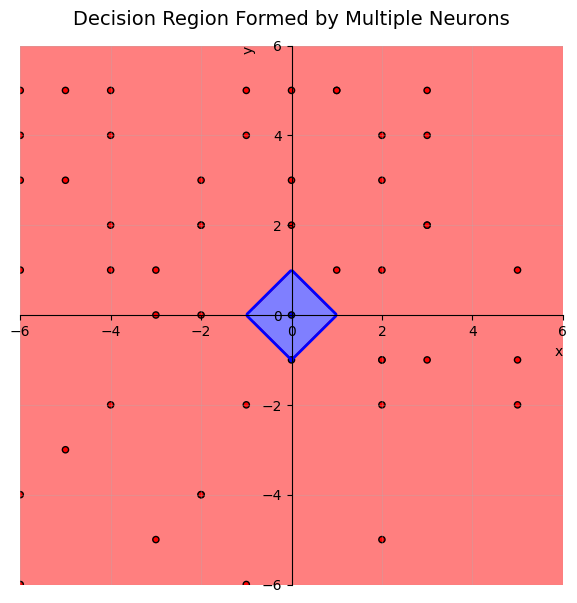

In [5]:
def step(x):
    return 1 if x >= 0 else 0

def neuron(x, w, b):
    """Compute neuron output using step activation."""
    return step(np.dot(x, w) + b)

def perceptron(x):
    """Combine multiple neurons to define a diamond shape region."""
    # Four boundary lines (square rotated 45°)
    L1 = line_equation_form((1, 0), (0, 1), above=False)
    L2 = line_equation_form((0, -1), (-1, 0), above=True)
    L3 = line_equation_form((-1, 0), (0, 1), above=False)
    L4 = line_equation_form((0, -1), (1, 0), above=True)

    # Compute which side of each line the point lies on
    n1 = neuron(x, L1[:2], L1[2])
    n2 = neuron(x, L2[:2], L2[2])
    n3 = neuron(x, L3[:2], L3[2])
    n4 = neuron(x, L4[:2], L4[2])

    # Final neuron activates only if inside all 4 regions
    n5 = neuron(np.array([n1, n2, n3, n4]), np.array([1, 1, 1, 1]), -4)
    return n5

# Generate random test points
points = np.random.randint(-6, 6, size=(50, 2))
outputs = np.array([perceptron(p) for p in points])

# Create a mesh grid for visualization
limit = 6
x = np.linspace(-limit, limit, 300)
y = np.linspace(-limit, limit, 300)
X, Y = np.meshgrid(x, y)
Z = np.array([[perceptron((xx, yy)) for xx, yy in zip(row_x, row_y)] for row_x, row_y in zip(X, Y)])

# Visualization
plt.figure(figsize=(7, 7))
plt.title("Decision Region Formed by Multiple Neurons", fontsize=14, pad=15)

# Plot decision boundary
plt.contour(X, Y, Z, levels=[0], colors=["blue"], linewidths=2)

# Highlight region where neuron output == 1
plt.contourf(X, Y, Z, levels=[0.5, 1.5], colors=["blue"], alpha=0.5)

# Highlight region where neuron output == 0
plt.contourf(X, Y, Z, levels=[-0.5, 0.5], colors=["red"], alpha=0.5)

# Optionally scatter sample points
# plt.scatter(X[Z == 1], Y[Z == 1], s=90, color='green')
plt.scatter(points[:, 0], points[:, 1], c=outputs, cmap="bwr_r", s=20, edgecolors="k")

# Labeling and axis styling
plt.xlabel("x", loc="right")
plt.ylabel("y", loc="top")
plt.xlim(-limit, limit)
plt.ylim(-limit, limit)
plt.grid(alpha=0.3)

# Center axes
ax = plt.gca()
ax.spines["left"].set_position("center")
ax.spines["bottom"].set_position("center")
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")

plt.show()


### Taking up a notch for reusability

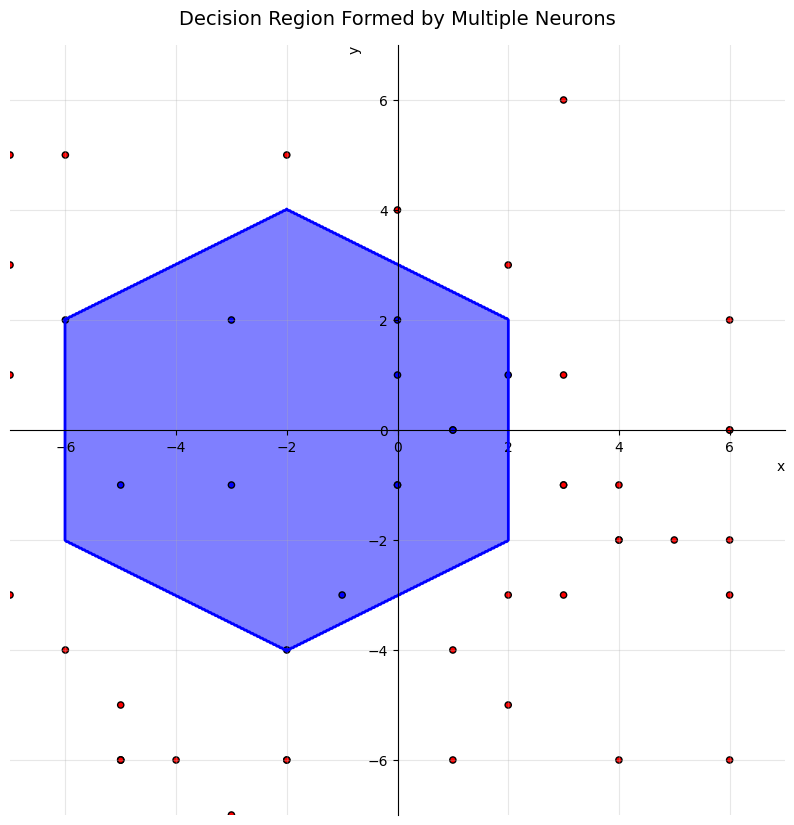

In [6]:
def perceptron(x):
    """Combine multiple neurons to define a diamond shape region."""
    L1 = line_equation_form((2, 2), (-2, 4), above=False)
    L2 = line_equation_form((-2, 4), (-6, 2), above=False)
    L3 = line_equation_form((-6, 2), (-6, -2), above=True)
    L4 = line_equation_form((-6, -2), (-2, -4), above=True)
    L5 = line_equation_form((-2, -4), (2, -2), above=True)
    L6 = line_equation_form((2, -2), (2, 2), above=False)

    # Compute which side of each line the point lies on
    n1 = neuron(x, L1[:2], L1[2])
    n2 = neuron(x, L2[:2], L2[2])
    n3 = neuron(x, L3[:2], L3[2])
    n4 = neuron(x, L4[:2], L4[2])
    n5 = neuron(x, L5[:2], L5[2])
    n6 = neuron(x, L6[:2], L6[2])

    n7 = neuron(np.array([n1, n2, n3, n4, n5, n6]), np.array([1, 1, 1, 1, 1, 1]), -6)
    return n7


def visualize_perceptron(
    perceptron,
    limit=7,
    n_points=50,
    resolution=480,
    title="Decision Region Formed by Multiple Neurons",
    highlight="both",
):
    """
    Visualizes the decision region formed by a perceptron that outputs 0/1.

    Parameters:
    -----------
    perceptron : callable
        Function that takes a 2D point (x, y) or np.array([x, y]) and returns 0 or 1.
    limit : float
        Plot limit for x and y axes.
    n_points : int
        Number of random test points to generate and display.
    resolution : int
        Grid resolution for contour visualization.
    title : str
        Plot title.
    highlight : str or None
        Which regions to color:
        - 'both': highlight both 0 and 1 regions
        - '1': highlight only the region where output == 1
        - '0': highlight only the region where output == 0
        - None: no filled regions
    """

    # Generate random test points
    points = np.random.randint(-limit, limit, size=(n_points, 2))
    outputs = np.array([perceptron(p) for p in points])

    # Create a mesh grid
    x = np.linspace(-limit, limit, resolution)
    y = np.linspace(-limit, limit, resolution)
    X, Y = np.meshgrid(x, y)
    Z = np.array(
        [
            [perceptron((xx, yy)) for xx, yy in zip(row_x, row_y)]
            for row_x, row_y in zip(X, Y)
        ]
    )

    # Plot setup
    plt.figure(figsize=(10, 10))
    plt.title(title, fontsize=14, pad=15)

    # Plot decision boundary line
    plt.contour(X, Y, Z, levels=[0], colors=["blue"], linewidths=2)

    # Conditionally fill regions
    if highlight in ("both", "1"):
        plt.contourf(X, Y, Z, levels=[0.5, 1.5], colors=["blue"], alpha=0.5)
    if highlight in ("both", "0"):
        plt.contourf(X, Y, Z, levels=[-0.5, 0.5], colors=["red"], alpha=0.5)

    # Scatter random test points
    plt.scatter(
        points[:, 0], points[:, 1], c=outputs, cmap="bwr_r", s=20, edgecolors="k"
    )

    # Labeling & axes
    plt.xlabel("x", loc="right")
    plt.ylabel("y", loc="top")
    plt.xlim(-limit, limit)
    plt.ylim(-limit, limit)
    plt.grid(alpha=0.3)

    # Center axes visually
    ax = plt.gca()
    ax.spines["left"].set_position("center")
    ax.spines["bottom"].set_position("center")
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")

    plt.show()

visualize_perceptron(perceptron, highlight="1")

### Hardcore: Circle Approx.

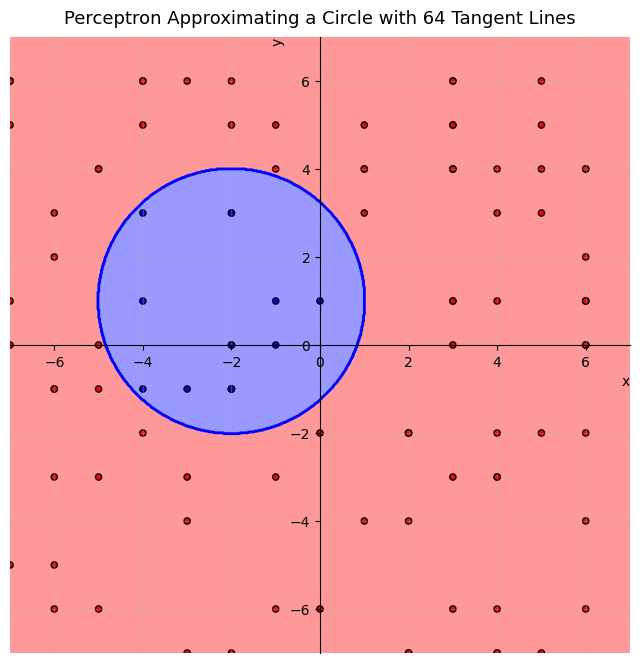

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import math


def approximate_circle(center, radius, n_segments=16):
    """Approximate a circle using tangent lines (A, B, C) for A*x + B*y + C = 0."""
    h, k = center
    lines = []
    for i in range(n_segments):
        theta = 2 * math.pi * i / n_segments
        A, B = math.cos(theta), math.sin(theta)
        C = -(A * h + B * k + radius)
        lines.append((A, B, C))
    return lines


def line_intersection(l1, l2):
    """Return intersection (x, y) of lines (A, B, C), or None if parallel."""
    A1, B1, C1 = l1
    A2, B2, C2 = l2
    det = A1 * B2 - A2 * B1
    if abs(det) < 1e-9:
        return None
    return ((B1 * C2 - B2 * C1) / det, (C1 * A2 - C2 * A1) / det)


def polygon_from_lines(lines):
    """Return polygon vertices by intersecting successive lines."""
    return np.array(
        [
            p
            for i in range(len(lines))
            if (p := line_intersection(lines[i], lines[(i + 1) % len(lines)]))
        ]
    )


def line_equation_form(p1, p2, center=None, above=None):
    """Return normalized line coefficients (A, B, C) from two points."""
    (x1, y1), (x2, y2) = p1, p2
    if x1 == x2:  # vertical
        A, B, C = (1, 0, -x1) if (above or (center and center[0] > x1)) else (-1, 0, x1)
    else:
        m, b = (y2 - y1) / (x2 - x1), y1 - (y2 - y1) / (x2 - x1) * x1
        A, B, C = -m, 1, -b
        if (above is False) or (center and A * center[0] + B * center[1] + C < 0):
            A, B, C = -A, -B, -C
    return [A, B, C]


def lines_from_polygon(points, center):
    """Return line equations (A, B, C) from polygon vertices, oriented by center."""
    return [
        line_equation_form(points[i], points[(i + 1) % len(points)], center=center)
        for i in range(len(points))
    ]


def perceptron_from_lines(x, lines):
    """Return 1 if point lies inside all half-planes defined by lines, else 0."""
    vals = [A * x[0] + B * x[1] + C for A, B, C in lines]
    return int(all(v >= 0 for v in vals))


def visualize_perceptron(
    perceptron, lines, n_points=50, limit=7, resolution=300, title=None, highlight="both"
):
    # Generate random test points
    points = np.random.randint(-limit, limit, size=(n_points, 2))
    outputs = np.array([perceptron(p, lines) for p in points])

    """Visualize decision region of a perceptron defined by polygon half-planes."""
    x = np.linspace(-limit, limit, resolution)
    y = np.linspace(-limit, limit, resolution)
    X, Y = np.meshgrid(x, y)
    Z = np.array(
        [
            [perceptron((xx, yy), lines) for xx, yy in zip(row_x, row_y)]
            for row_x, row_y in zip(X, Y)
        ]
    )

    plt.figure(figsize=(8, 8))
    plt.title(title or "Perceptron Region", fontsize=13, pad=10)

    # Contour & regions
    plt.contour(X, Y, Z, levels=[0], colors="blue", linewidths=2)
    if highlight in ("both", "1"):
        plt.contourf(X, Y, Z, levels=[0.5, 1.5], colors="blue", alpha=0.4)
    if highlight in ("both", "0"):
        plt.contourf(X, Y, Z, levels=[-0.5, 0.5], colors="red", alpha=0.4)

    # Scatter random test points
    plt.scatter(
        points[:, 0], points[:, 1], c=outputs, cmap="bwr_r", s=20, edgecolors="k"
    )

    # Axes
    ax = plt.gca()
    ax.spines["left"].set_position("center")
    ax.spines["bottom"].set_position("center")
    ax.spines["top"].set_color("none")
    ax.spines["right"].set_color("none")
    plt.xlim(-limit, limit)
    plt.ylim(-limit, limit)
    plt.grid(alpha=0.3)
    plt.xlabel("x", loc="right")
    plt.ylabel("y", loc="top")
    plt.show()


# --- Example Usage ---
center, radius, n_segments = (-2, 1), 3, 64
circle_lines = approximate_circle(center, radius, n_segments)
polygon_points = polygon_from_lines(circle_lines)
auto_lines = lines_from_polygon(polygon_points, center=center)

visualize_perceptron(
    perceptron_from_lines,
    auto_lines,
    n_points=100,
    limit=7,
    resolution=720,
    title=f"Perceptron Approximating a Circle with {n_segments} Tangent Lines",
    highlight="both",
)

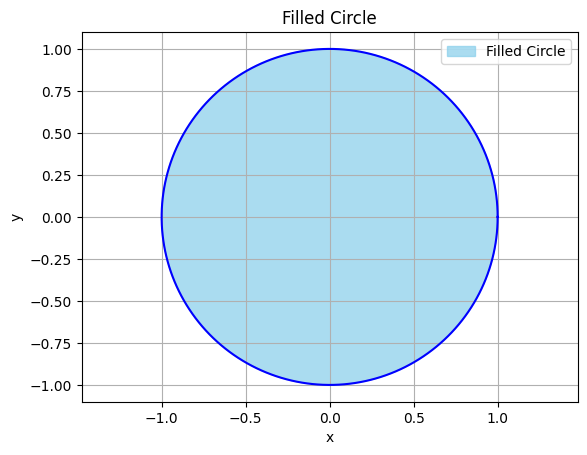

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Circle parameters
h, k = 0, 0  # Center
r = 1  # Radius

# Generate angle values from 0 to 2π
theta = np.linspace(0, 2 * np.pi, 200)

# Parametric equations for the circle
x = h + r * np.cos(theta)
y = k + r * np.sin(theta)

# Fill the circle
plt.fill(x, y, color="skyblue", alpha=0.7, label="Filled Circle")

# Optionally draw the outline too
plt.plot(x, y, color="blue")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Filled Circle")
plt.legend()
plt.axis("equal")  # Ensure the circle isn’t stretched
plt.grid(True)
plt.show()